In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import os

In [3]:
os.chdir('/Users/ariana/desktop/historical_tech')

In [4]:
# don't use default na, this erroneously converts 'NA' (iso code for Namibia) to a missing value
# I manually input all the default na vals except for 'NA' to prevent this
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
hatch_v2 = pd.read_csv('all_tech_version 2.0.csv', keep_default_na=False, 
                       na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
                                  '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', 'None', ''])

In [5]:
# we just want to test cost data
hatch_v2_cost = hatch_v2[(hatch_v2['Metric']=='Levelized Cost of Energy') | (hatch_v2['Metric']=='Price') | (hatch_v2['Metric']=='Total Installed Cost')]
hatch_v2_cost.reset_index(drop=True, inplace=True)

In [6]:
tech_cost_list = set(hatch_v2_cost['Technology Name'])
len(tech_cost_list)

105

In [7]:
hatch_v2_cost_world = hatch_v2_cost[(hatch_v2_cost['Country Name']=='World') & (hatch_v2_cost['Metric']!='Total Installed Cost')]
hatch_v2_cost_world.reset_index(drop=True, inplace=True)
hatch_v2_cost_world


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Maleic Anhydride_Price_World,Global,World,World,Maleic Anhydride,Price,2022 USD/lb,PCDB,Price|Maleic Anhydride,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Polyvinylchloride_Price_World,Global,World,World,Polyvinylchloride,Price,2022 USD/lb,PCDB,Price|Polyvinylchloride,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pentaerythritol_Price_World,Global,World,World,Pentaerythritol,Price,2022 USD/lb,PCDB,Price|Pentaerythritol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paraxylene_Price_World,Global,World,World,Paraxylene,Price,2022 USD,PCDB,Price|Paraxylene,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Urea_Price_World,Global,World,World,Urea,Price,2022 USD/lb,PCDB,Price|Urea,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Polyester Fiber_Price_World,Global,World,World,Polyester Fiber,Price,2022 USD/lb,PCDB,Price|Polyester Fiber,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Bioenergy_Levelized Cost of Energy_World,Global,World,World,Bioenergy,Levelized Cost of Energy,2022 USD/kWh,IRENA,Levelized Cost of Energy|Bioenergy,NaN,...,0.076145,0.076029,0.059223,0.068394,0.077530,0.072042,NaN,NaN,NaN,NaN
73,Geothermal Energy_Levelized Cost of Energy_World,Global,World,World,Geothermal Energy,Levelized Cost of Energy,2022 USD/kWh,IRENA,Levelized Cost of Energy|Geothermal Energy,NaN,...,0.072533,0.075866,0.072300,0.072002,0.058051,0.072334,NaN,NaN,NaN,NaN
74,Styrene_Price_World,Global,World,World,Styrene,Price,2022 USD/lb,PCDB,Price|Styrene,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def hatch_plot(df, idx, entity):
    tech_name = df.iloc[idx]['Technology Name']
    unit = df.iloc[idx]['Unit']
    tech_series = df.iloc[idx][9:]
    tech_series.dropna(how='all', inplace=True)
    ax = tech_series.plot.line()
    ax.set_title(tech_name + ' (' + entity +')')
    ax.set_ylabel(unit)
    ax.set_ylim(ymin=0)
    file_name = 'visualize/cost visuals/' + tech_name + '.png'
    matplotlib.pyplot.savefig(file_name)
    # line below is needed to clear axes
    # without it the loop will write over the same graph and try to plot 100 lines on one graph
    matplotlib.pyplot.cla()

In [9]:
world_cost = set(hatch_v2_cost_world['Technology Name'])
len(world_cost)

76

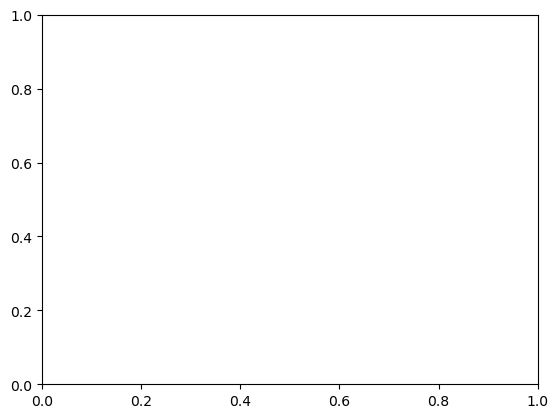

In [10]:
for idx in range(len(hatch_v2_cost_world)):
    hatch_plot(hatch_v2_cost_world, idx, 'World')

In [11]:
no_world_data = list(tech_cost_list - world_cost)
len(no_world_data)

29

In [12]:
idx_world = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_data:
        idx_world.append(idx)
hatch_v2_cost_no_world = hatch_v2_cost.drop(idx_world)
len(set(hatch_v2_cost_no_world['Technology Name']))

29

In [13]:
hatch_v2_cost_us = hatch_v2_cost_no_world[(hatch_v2_cost_no_world['Country Code']=='US') & ((hatch_v2_cost_no_world['Technology Name']!='Combined Refrigerators-Freezers'))]
hatch_v2_cost_us.reset_index(drop=True, inplace=True)
hatch_v2_cost_us

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Natural Gas Production_Price_US,National,US,US,Natural Gas Production,Price,USD/million Btu,BP,Price|Natural Gas Production,NaN,...,2.461839,2.960584,3.116446,2.5119,1.988582,3.839473,NaN,NaN,NaN,NaN
1,Electric Water Heaters and Immersion Heaters_P...,National,US,United States of America,Electric Water Heaters and Immersion Heaters,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Electric Water Heaters and Immersion Hea...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Household Washing and Drying Machines_Price_US,National,US,United States of America,Household Washing and Drying Machines,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Household Washing and Drying Machines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Microwave Ovens_Price_US,National,US,United States of America,Microwave Ovens,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Microwave Ovens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
us_cost = set(hatch_v2_cost_us['Technology Name'])
len(us_cost)

4

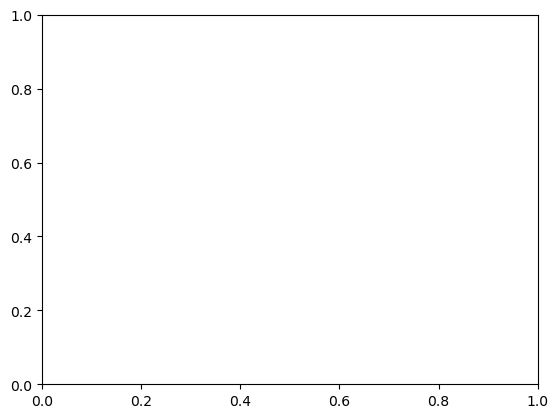

In [15]:
for idx in range(len(hatch_v2_cost_us)):
    hatch_plot(hatch_v2_cost_us, idx, 'US')

In [16]:
no_world_or_us_data = list(tech_cost_list - world_cost - us_cost)
len(no_world_or_us_data)

25

In [17]:
idx_world_us = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_data or tech not in no_world_or_us_data:
        idx_world_us.append(idx)
hatch_v2_cost_no_world_or_us = hatch_v2_cost.drop(idx_world_us)

In [18]:
hatch_v2_cost_gb = hatch_v2_cost_no_world_or_us[(hatch_v2_cost_no_world_or_us['Country Code']=='GB') & (hatch_v2_cost_no_world_or_us['Technology Name']!='Refined Copper') & (hatch_v2_cost_no_world_or_us['Technology Name']!='Caustic Soda') & (hatch_v2_cost_no_world_or_us['Technology Name']!='Nitrogenous Fertilizers') & (hatch_v2_cost_no_world_or_us['Technology Name']!='Radio Receivers') & (hatch_v2_cost_no_world_or_us['Technology Name']!='Synthetic Filament Tow and Staple Fibers')]
hatch_v2_cost_gb.reset_index(drop=True, inplace=True)
hatch_v2_cost_gb


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Bicycles and Other Cycles_Price_GB,National,GB,United Kingdom,Bicycles and Other Cycles,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Bicycles and Other Cycles,NaN,...,0.747428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turbo-Jets of a Thrust Not Exceeding 25 kN_Pri...,National,GB,United Kingdom,Turbo-Jets of a Thrust Not Exceeding 25 kN,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Turbo-Jets of a Thrust Not Exceeding 25 kN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Telephones and Videophones_Price_GB,National,GB,United Kingdom,Telephones and Videophones,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Telephones and Videophones,NaN,...,0.174677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Household Refrigerators and Freezers_Price_GB,National,GB,United Kingdom,Household Refrigerators and Freezers,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Household Refrigerators and Freezers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beer_Price_GB,National,GB,United Kingdom,Beer,Price,thousand USD/hectolitre,UN Industrial Commodity Statistics Database,Price|Beer,NaN,...,0.087095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Combined Refrigerators-Freezers_Price_GB,National,GB,United Kingdom,Combined Refrigerators-Freezers,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Combined Refrigerators-Freezers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Air Conditioning Machines_Price_GB,National,GB,United Kingdom,Air Conditioning Machines,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Air Conditioning Machines,NaN,...,0.609574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Vacuum Cleaners_Price_GB,National,GB,United Kingdom,Vacuum Cleaners,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Vacuum Cleaners,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Cars_Price_GB,National,GB,United Kingdom,Cars,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Cars,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
gb_cost = set(hatch_v2_cost_gb['Technology Name'])
len(gb_cost)

9

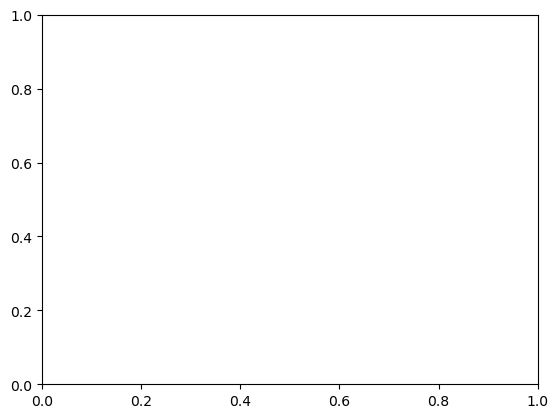

In [20]:
for idx in range(len(hatch_v2_cost_gb)):
    hatch_plot(hatch_v2_cost_gb, idx, 'UK')

In [21]:
no_world_us_or_gb_data = list(tech_cost_list - world_cost - us_cost - gb_cost)
no_world_us_or_gb_data

['Television Receivers',
 "Cow's Milk Production",
 'Synthetic Filament Yarn',
 'Synthetic Filament Tow and Staple Fibers',
 'Cotton Seed Production',
 'Sugar Cane Production',
 'Coal Production',
 'Liquefied Natural Gas (LNG)',
 'Caustic Soda',
 'Corn Production',
 'Nitrogenous Fertilizers',
 'Refined Copper',
 'Potassic Fertilizers',
 'Motorcycles and Scooters',
 'Radio Receivers',
 'Soybean Production']

In [22]:
idx_world_us_gb = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_us_or_gb_data:
        idx_world_us_gb.append(idx)
hatch_v2_cost_no_world_us_or_gb = hatch_v2_cost.drop(idx_world_us_gb)
hatch_v2_cost_jp = hatch_v2_cost_no_world_us_or_gb[(hatch_v2_cost_no_world_us_or_gb['Country Code']=='JP') & (hatch_v2_cost_no_world_us_or_gb['Technology Name']!='Synthetic Filament Yarn')]
hatch_v2_cost_jp.reset_index(drop=True, inplace=True)
hatch_v2_cost_jp

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Sugar Cane Production_Price_JP,National,JP,Japan,Sugar Cane Production,Price,2022 USD/tonne,FAOSTAT,Price|Sugar Cane Production,NaN,...,241.870227,240.411713,232.511429,238.223942,246.367312,243.571827,NaN,NaN,NaN,NaN
1,Television Receivers_Price_JP,National,JP,Japan,Television Receivers,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Television Receivers,NaN,...,0.000587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Radio Receivers_Price_JP,National,JP,Japan,Radio Receivers,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Radio Receivers,NaN,...,0.015700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Caustic Soda_Price_JP,National,JP,Japan,Caustic Soda,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Caustic Soda,NaN,...,0.321921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Refined Copper_Price_JP,National,JP,Japan,Refined Copper,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Refined Copper,NaN,...,5.534427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Soybean Production_Price_JP,National,JP,Japan,Soybean Production,Price,2022 USD/tonne,FAOSTAT,Price|Soybean Production,NaN,...,1618.099665,1368.450697,1267.083978,1437.000851,1688.351419,1599.260526,NaN,NaN,NaN,NaN
6,Liquefied Natural Gas (LNG)_Price_JP,National,JP,Japan,Liquefied Natural Gas (LNG),Price,USD/million Btu,BP,Price|Liquefied Natural Gas (LNG),NaN,...,6.933119,8.098270,10.066989,9.944666,7.781412,10.072739,NaN,NaN,NaN,NaN
7,Cow's Milk Production_Price_JP,National,JP,Japan,Cow's Milk Production,Price,2022 USD/tonne,FAOSTAT,Price|Cow's Milk Production,NaN,...,1128.403612,1109.564474,1134.845382,1170.700516,1200.964680,1160.612461,NaN,NaN,NaN,NaN


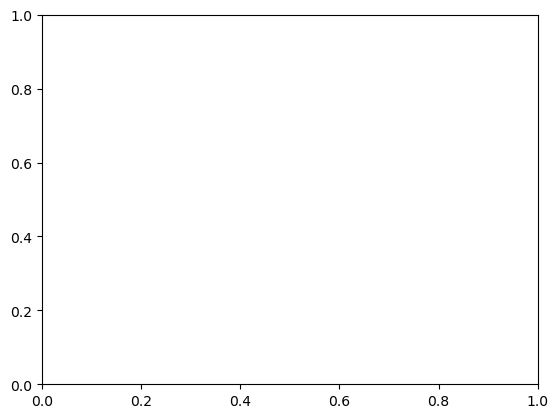

In [23]:
for idx in range(len(hatch_v2_cost_jp)):
    hatch_plot(hatch_v2_cost_jp, idx, 'Japan')

In [24]:
set(hatch_v2_cost_no_world_us_or_gb['Technology Name'])


{'Caustic Soda',
 'Coal Production',
 'Corn Production',
 'Cotton Seed Production',
 "Cow's Milk Production",
 'Liquefied Natural Gas (LNG)',
 'Motorcycles and Scooters',
 'Nitrogenous Fertilizers',
 'Potassic Fertilizers',
 'Radio Receivers',
 'Refined Copper',
 'Soybean Production',
 'Sugar Cane Production',
 'Synthetic Filament Tow and Staple Fibers',
 'Synthetic Filament Yarn',
 'Television Receivers'}

In [25]:
hatch_v2_cost_br = hatch_v2_cost_no_world_us_or_gb[((hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Synthetic Filament Tow and Staple Fibers') | (hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Synthetic Filament Yarn') | (hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Nitrogenous Fertilizers') | (hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Corn Production') | (hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Motorcycles and Scooters')) & (hatch_v2_cost_no_world_us_or_gb['Country Code']=='BR')]
hatch_v2_cost_br.reset_index(drop=True, inplace=True)
hatch_v2_cost_br

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Corn Production_Price_BR,National,BR,Brazil,Corn Production,Price,2022 USD/tonne,FAOSTAT,Price|Corn Production,NaN,...,223.031089,NaN,152.17162,145.000593,167.729102,NaN,NaN,NaN,NaN,NaN
1,Motorcycles and Scooters_Price_BR,National,BR,Brazil,Motorcycles and Scooters,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Motorcycles and Scooters,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Synthetic Filament Tow and Staple Fibers_Price_BR,National,BR,Brazil,Synthetic Filament Tow and Staple Fibers,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Synthetic Filament Tow and Staple Fibers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Synthetic Filament Yarn_Price_BR,National,BR,Brazil,Synthetic Filament Yarn,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Synthetic Filament Yarn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nitrogenous Fertilizers_Price_BR,National,BR,Brazil,Nitrogenous Fertilizers,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Nitrogenous Fertilizers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


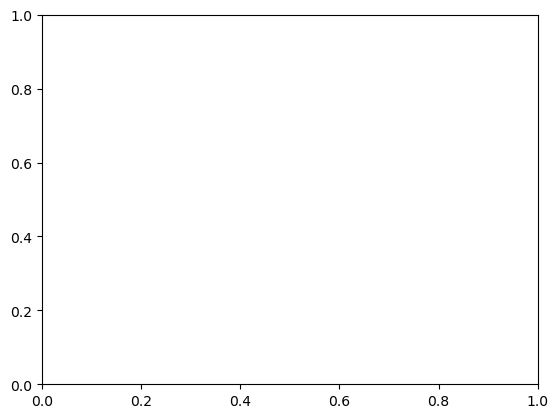

In [26]:
for idx in range(len(hatch_v2_cost_br)):
    hatch_plot(hatch_v2_cost_br, idx, 'Brazil')

In [27]:
coal = hatch_v2_cost_no_world_us_or_gb[(hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Coal Production') & (hatch_v2_cost_no_world_us_or_gb['Country Name']=='North America')]
coal.reset_index(drop=True, inplace=True)
coal

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Coal Production_Price_North America,National,North America,North America,Coal Production,Price,USD/metric ton,BP,Price|Coal Production,NaN,...,51.447733,63.82529,72.844012,57.163984,42.76637,68.538142,NaN,NaN,NaN,NaN


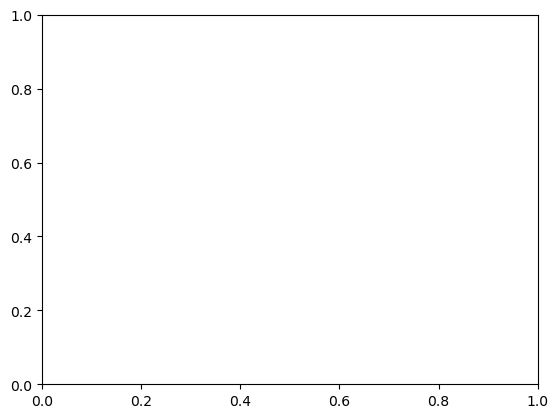

In [28]:
for idx in range(len(coal)):
    hatch_plot(coal, idx, 'North America')

In [29]:
cotton = hatch_v2_cost_no_world_us_or_gb[(hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Cotton Seed Production') & (hatch_v2_cost_no_world_us_or_gb['Country Name']=='Israel')]
cotton.reset_index(drop=True, inplace=True)
cotton


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Cotton Seed Production_Price_IL,National,IL,Israel,Cotton Seed Production,Price,2022 USD/tonne,FAOSTAT,Price|Cotton Seed Production,NaN,...,314.917466,336.187461,414.704128,438.161894,494.31468,550.467466,NaN,NaN,NaN,NaN


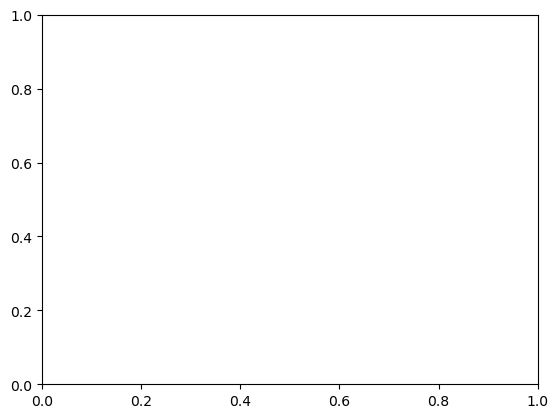

In [30]:
for idx in range(len(cotton)):
    hatch_plot(cotton, idx, 'Israel')

In [31]:
potash = hatch_v2_cost_no_world_us_or_gb[(hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Potassic Fertilizers') & (hatch_v2_cost_no_world_us_or_gb['Country Name']=='Finland')]
potash.reset_index(drop=True, inplace=True)
potash


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Potassic Fertilizers_Price_FI,National,FI,Finland,Potassic Fertilizers,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Potassic Fertilizers,NaN,...,0.503169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


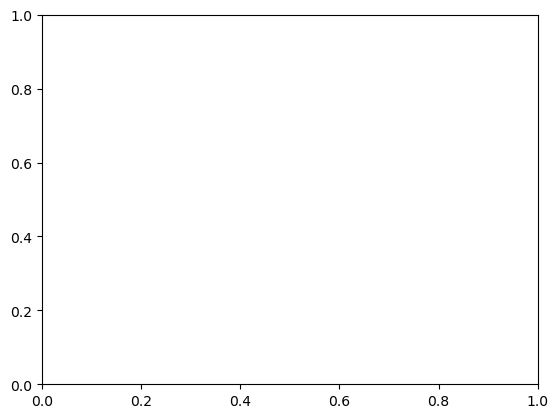

In [32]:
for idx in range(len(potash)):
    hatch_plot(potash, idx, 'Finland')

In [33]:
print(len(os.listdir('visualize/cost visuals')))
for x in os.listdir('visualize/cost visuals'):
    if '.png' not in x:
        print(x)

106
.DS_Store
